In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
TABLE_DIR = "tables"

In [27]:
# https://data.cso.ie/table/HPM04
buyer_data = pd.read_csv(os.path.join(TABLE_DIR, "Market-basedHousholdPurchasesofRedisentialDwellings.csv"))
buyer_data

,Statistic,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE
0,Volume of Sales,2010M01,All Dwelling Statuses,All,Filings,All Buyer Types,Number,982.0
1,Volume of Sales,2010M01,All Dwelling Statuses,All,Filings,Household Buyer - First-Time Buyer Owner-Occupier,Number,534.0
2,Volume of Sales,2010M01,All Dwelling Statuses,All,Filings,Household Buyer - Former Owner-Occupier,Number,292.0
3,Volume of Sales,2010M01,All Dwelling Statuses,All,Filings,Household Buyer - Non-Occupier,Number,156.0
4,Volume of Sales,2010M01,All Dwelling Statuses,All,Executions,All Buyer Types,Number,947.0
...,...,...,...,...,...,...,...,...
315835,Mean Sale Price,2021M09,All Dwelling Statuses,Y35: Wexford,Filings,Household Buyer - Non-Occupier,Euro,231454.0
315836,Mean Sale Price,2021M09,All Dwelling Statuses,Y35: Wexford,Executions,All Buyer Types,Euro,258224.0
315837,Mean Sale Price,2021M09,All Dwelling Statuses,Y35: Wexford,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,178700.0
315838,Mean Sale Price,2021M09,All Dwelling Statuses,Y35: Wexford,Executions,Household Buyer - Former Owner-Occupier,Euro,275375.0


In [28]:
filtered = buyer_data.loc[(buyer_data["Statistic"] == "Mean Sale Price") & (buyer_data["Eircode Output"] == "All") & (buyer_data["Stamp Duty Event"] == "Filings")]

<AxesSubplot:>

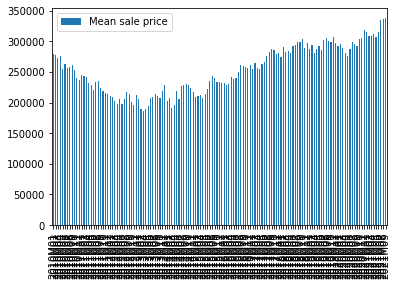

In [29]:
all_buyers = filtered.loc[buyer_data["Type of Buyer"] == "All Buyer Types"]
pd.DataFrame(
    {
        "Mean sale price": all_buyers["VALUE"].tolist(), 
    },
    index=all_buyers["Month"].unique()
).plot.bar()

<AxesSubplot:>

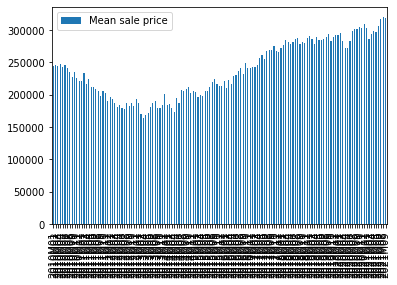

In [30]:
ftboo = filtered.loc[buyer_data["Type of Buyer"] == "Household Buyer - First-Time Buyer Owner-Occupier"]
pd.DataFrame(
    {
        "Mean sale price": ftboo["VALUE"].tolist(), 
    },
    index=ftboo["Month"].unique()
).plot.bar()

<AxesSubplot:>

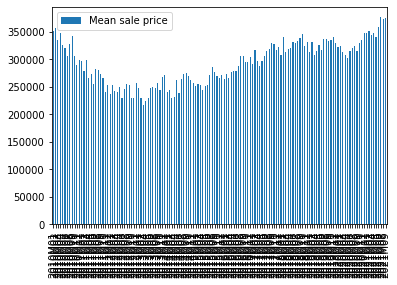

In [31]:
foo = filtered.loc[buyer_data["Type of Buyer"] == "Household Buyer - Former Owner-Occupier"]
pd.DataFrame(
    {
        "Mean sale price": foo["VALUE"].tolist(), 
    },
    index=foo["Month"].unique()
).plot.bar()

<AxesSubplot:>

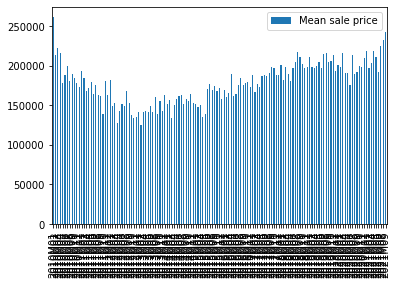

In [32]:
no = filtered.loc[buyer_data["Type of Buyer"] == "Household Buyer - Non-Occupier"]
pd.DataFrame(
    {
        "Mean sale price": no["VALUE"].tolist(), 
    },
    index=no["Month"].unique()
).plot.bar()

In [33]:
# Pearson product-moment correlation coefficients.
np.corrcoef(all_buyers["VALUE"].tolist(), ftboo["VALUE"].tolist())

array([[1.        , 0.98143645],
       [0.98143645, 1.        ]])

In [34]:
# Pearson product-moment correlation coefficients.
np.corrcoef(all_buyers["VALUE"].tolist(), no["VALUE"].tolist())

array([[1.        , 0.89676878],
       [0.89676878, 1.        ]])

In [35]:
# Pearson product-moment correlation coefficients.
np.corrcoef(all_buyers["VALUE"].tolist(), no["VALUE"].tolist())

array([[1.        , 0.89676878],
       [0.89676878, 1.        ]])